<a href="https://colab.research.google.com/github/vfeistauer/Glioma-Classification/blob/main/GliomaClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('/content/TCGA_InfoWithGrade.csv')

In [3]:
df.head()

,Grade,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,0,0,51.30,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,38.72,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,35.17,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,32.78,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,31.51,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839 entries, 0 to 838
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Grade             839 non-null    int64  
 1   Gender            839 non-null    int64  
 2   Age_at_diagnosis  839 non-null    float64
 3   Race              839 non-null    int64  
 4   IDH1              839 non-null    int64  
 5   TP53              839 non-null    int64  
 6   ATRX              839 non-null    int64  
 7   PTEN              839 non-null    int64  
 8   EGFR              839 non-null    int64  
 9   CIC               839 non-null    int64  
 10  MUC16             839 non-null    int64  
 11  PIK3CA            839 non-null    int64  
 12  NF1               839 non-null    int64  
 13  PIK3R1            839 non-null    int64  
 14  FUBP1             839 non-null    int64  
 15  RB1               839 non-null    int64  
 16  NOTCH1            839 non-null    int64  
 1

In [5]:
pd.set_option('display.max_columns', None)
df.describe()

,Grade,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,PIK3CA,NF1,PIK3R1,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
count,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000
mean,0.419547,0.418355,50.935411,0.107271,0.481526,0.414779,0.258641,0.168057,0.133492,0.132300,0.116806,0.087008,0.079857,0.064362,0.053635,0.047676,0.045292,0.034565,0.032181,0.032181,0.032181,0.027414,0.027414,0.026222
std,0.493779,0.493583,15.702339,0.369392,0.499957,0.492978,0.438149,0.374140,0.340309,0.339019,0.321380,0.282015,0.271233,0.245544,0.225431,0.213206,0.208068,0.182784,0.176586,0.176586,0.176586,0.163383,0.163383,0.159889
min,0.000000,0.000000,14.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,38.055000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,51.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,62.800000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,89.290000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='Grade', ylabel='count'>

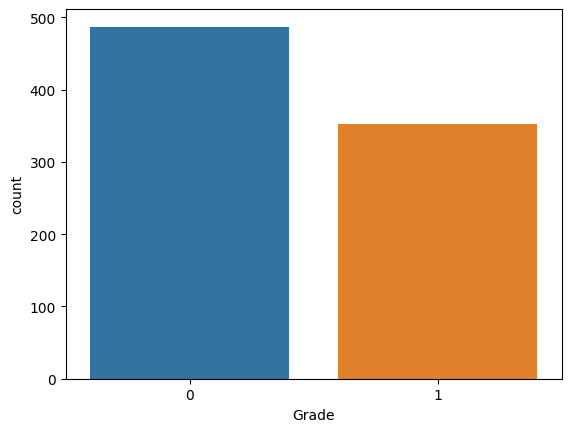

In [6]:
sns.countplot(df, x= 'Grade')

In [7]:
df['Grade'].value_counts()

0    487
1    352
Name: Grade, dtype: int64

Dados desbalanceados ??? No desbalanceamento leve, a classe de minoria representa de 20-40%, nesses dados a classe de minoria representa 42%.

[Link Google](https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data?hl=pt-br)

<Axes: xlabel='Age_at_diagnosis', ylabel='Count'>

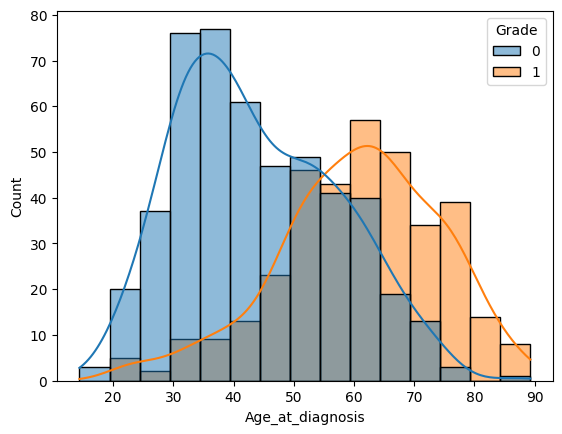

In [8]:
sns.histplot(df, x= 'Age_at_diagnosis', kde=True, hue = 'Grade')

Podemos observar que o LGG (Lower-Grade Glioma) tem, em média, uma idade de diagnóstico mais baixa, e GBM (Glioblastoma Multiforme) tem, em média, idade diagnóstica maior.

In [9]:
mean_age_by_grade = df.groupby('Grade')['Age_at_diagnosis'].mean()
std_age_by_grade = df.groupby('Grade')['Age_at_diagnosis'].std()

print("Mean age at diagnosis by grade:")
for grade, mean_age in mean_age_by_grade.items():
    std_age = std_age_by_grade[grade]
    print(f"Grade {grade}: {mean_age:.2f} +- {std_age:.2f}")

Mean age at diagnosis by grade:
Grade 0: 43.87 +- 13.26
Grade 1: 60.70 +- 13.43


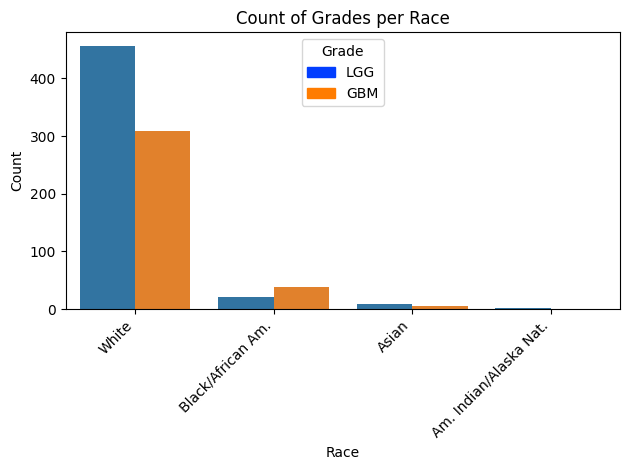

In [10]:
import matplotlib.patches as mpatches

race_labels = {
    0: 'White',
    1: 'Black/African Am.',
    2: 'Asian',
    3: 'Am. Indian/Alaska Nat.'
}

# Group the data by Race and Grade and calculate the count
grouped_data = df.groupby(['Race', 'Grade']).size().reset_index(name='Count')

# Create a bar plot with color palette
sns.barplot(data=grouped_data, x='Race', y='Count', hue='Grade')

# Set the x-axis labels using the race_labels dictionary and rotate them
plt.xticks(ticks=range(len(race_labels)), labels=race_labels.values(), rotation=45, ha='right')

# Set the axis labels
plt.xlabel('Race')
plt.ylabel('Count')

# Set the plot title
plt.title('Count of Grades per Race')

# Create custom legend handles and labels
legend_labels = ['LGG', 'GBM']
colors = sns.color_palette('bright')[:len(legend_labels)]
legend_handles = [mpatches.Patch(color=color, label=label) for color, label in zip(colors, legend_labels)]

# Add the custom legend
plt.legend(handles=legend_handles, title='Grade')

# Display the plot
plt.tight_layout()
plt.show()

Poucos dados em raças não-brancas. Vulnerabilidade socio-econômica? Viés?? Usar ou não a variável.

In [11]:
df.isnull().sum()

Grade               0
Gender              0
Age_at_diagnosis    0
Race                0
IDH1                0
TP53                0
ATRX                0
PTEN                0
EGFR                0
CIC                 0
MUC16               0
PIK3CA              0
NF1                 0
PIK3R1              0
FUBP1               0
RB1                 0
NOTCH1              0
BCOR                0
CSMD3               0
SMARCA4             0
GRIN2A              0
IDH2                0
FAT4                0
PDGFRA              0
dtype: int64

In [12]:
df.drop(['Race'], axis=1)

,Grade,Gender,Age_at_diagnosis,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,PIK3CA,NF1,PIK3R1,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,0,0,51.30,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,38.72,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,35.17,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,32.78,1,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
4,0,0,31.51,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,1,1,77.89,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
835,1,0,85.18,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
836,1,1,77.49,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
837,1,0,63.33,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0


## **MACHINE LEARNING**

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = df.drop(['Grade'], axis=1)
y = df['Grade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

**Suport Vector Classifier**

In [15]:
from sklearn.svm import SVC

In [16]:
model = SVC()

In [17]:
model.fit(X_train,y_train)

SVC()

In [18]:
predictions = model.predict(X_test)

In [19]:
from sklearn.metrics import classification_report,confusion_matrix

In [20]:
print(confusion_matrix(y_test,predictions))

[[126  33]
 [ 31  62]]


In [21]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80       159
           1       0.65      0.67      0.66        93

    accuracy                           0.75       252
   macro avg       0.73      0.73      0.73       252
weighted avg       0.75      0.75      0.75       252



## Gridsearch
Finding the right parameters (like what C or gamma values to use) is a tricky task! But luckily, we can be a little lazy and just try a bunch of combinations and see what works best! This idea of creating a 'grid' of parameters and just trying out all the possible combinations is called a Gridsearch, this method is common enough that Scikit-learn has this functionality built in with GridSearchCV! The CV stands for cross-validation which is the

GridSearchCV takes a dictionary that describes the parameters that should be tried and a model to train. The grid of parameters is defined as a dictionary, where the keys are the parameters and the values are the settings to be tested.

In [22]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [25]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.559 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.559 total time=   0.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.564 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.556 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.556 total time=   0.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.746 total time=   0.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.754 total time=   0.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.761 total time=   0.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.718 total time=   0.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.821 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.720 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [26]:
grid.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [27]:
grid.best_estimator_

SVC(C=1000, gamma=0.001)

In [28]:
grid_predictions = grid.predict(X_test)

In [29]:
print(confusion_matrix(y_test,grid_predictions))

[[125  34]
 [  5  88]]


In [30]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.96      0.79      0.87       159
           1       0.72      0.95      0.82        93

    accuracy                           0.85       252
   macro avg       0.84      0.87      0.84       252
weighted avg       0.87      0.85      0.85       252



## Decision Trees

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
dtree = DecisionTreeClassifier()

In [33]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [34]:
predictions = dtree.predict(X_test)

In [35]:
from sklearn.metrics import classification_report,confusion_matrix

In [36]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80       159
           1       0.65      0.80      0.71        93

    accuracy                           0.77       252
   macro avg       0.76      0.77      0.76       252
weighted avg       0.78      0.77      0.77       252



In [37]:
print(confusion_matrix(y_test,predictions))

[[119  40]
 [ 19  74]]


## Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [39]:
rfc_pred = rfc.predict(X_test)

In [40]:
print(confusion_matrix(y_test,rfc_pred))

[[127  32]
 [ 10  83]]


In [41]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86       159
           1       0.72      0.89      0.80        93

    accuracy                           0.83       252
   macro avg       0.82      0.85      0.83       252
weighted avg       0.85      0.83      0.84       252



In [42]:
parameters = {
  "n_estimators":[5,10,50,100,250],
  "max_depth":[2,4,8,16,32,None]

}

In [ ]:
from sklearn.model_selection import GridSearchCV

cv = GridSearchCV(rfc,parameters,cv=5)
cv.fit(X_train, y_train.values.ravel())

In [ ]:
def display(results):
  print(f'Best parameters are: {results.best_params_}')
  print("\n")
  mean_score = results.cv_results_['mean_test_score']
  std_score = results.cv_results_['std_test_score']
  params = results.cv_results_['params']
  for mean,std,params in zip(mean_score,std_score,params):
      print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [ ]:
display(cv)

In [ ]:
rfc = RandomForestClassifier(max_depth = 8, n_estimators= 50)
rfc.fit(X_train, y_train)

In [ ]:
rfc_pred = rfc.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,rfc_pred))

In [ ]:
print(classification_report(y_test,rfc_pred))

In [ ]:
rfc = RandomForestClassifier(max_depth = 8, n_estimators= 50)

cv = GridSearchCV(rfc,{'max_features': ["sqrt", "log2", 1, 2, 3, 4, 5, 6]},cv=5)
cv.fit(X_train, y_train.values.ravel())

In [ ]:
results = pd.DataFrame({"max_features": [param["max_features"] for param in cv.cv_results_['params']],
           "mean_score": list(cv.cv_results_['mean_test_score']),
           "std_score": cv.cv_results_['std_test_score']})
results

In [ ]:
from plotnine import *

(
   ggplot(results) + geom_boxplot(aes(x='factor(max_features)', y='mean_score')) +
  geom_errorbar(aes(x='factor(max_features)', ymin='mean_score - std_score', ymax='mean_score + std_score')) +
  theme_classic() + xlab('Maximum number of features') + ylab('Mean score')
)

In [ ]:
rfc = RandomForestClassifier(max_depth = 8, n_estimators= 50, max_features='sqrt')
rfc.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
# Fazendo previsões nas probabilidades estimadas
y_pred_prob = rfc.predict_proba(X_test)[:, 1]  # Probabilidades da classe positiva


# Calculando a pontuação ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("Pontuação ROC AUC:", roc_auc)

In [ ]:
rfc_pred = rfc.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,rfc_pred))

0 || 1

0: TRUE POSITIVE   ||  FALSE POSITIVE

1: FALSE NEGATIVE  ||  TRUE NEGATIVE

In [ ]:
print(classification_report(y_test,rfc_pred))

Está melhorando a acurácia do '0 = LGG', porém não altera a acurácia em '1 = GBM'

## XGBoost

In [ ]:
pip install --upgrade category_encoders

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

estimators = [
    ('clf', XGBClassifier(random_state=8)) # can customize objective function with the objective parameter
]
pipe = Pipeline(steps=estimators)
pipe

In [ ]:
pip install scikit-optimize

In [ ]:
"""busca de hiperparâmetros usando o método de otimização Bayesiana (Bayesian Optimization) com validação cruzada (cross-validation).
A métrica de avaliação escolhida é a área sob a curva ROC (roc_auc).
O algoritmo de otimização tentará encontrar os valores de hiperparâmetros que maximizam essa métrica.
"""
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

search_space = {
    'clf__max_depth': Integer(2,8),
    'clf__learning_rate': Real(0.001, 1.0, prior='log-uniform'),
    'clf__subsample': Real(0.5, 1.0),
    'clf__colsample_bytree': Real(0.5, 1.0),
    'clf__colsample_bylevel': Real(0.5, 1.0),
    'clf__colsample_bynode' : Real(0.5, 1.0),
    'clf__reg_alpha': Real(0.0, 10.0),
    'clf__reg_lambda': Real(0.0, 10.0),
    'clf__gamma': Real(0.0, 10.0)
}

opt = BayesSearchCV(pipe, search_space, cv=10, n_iter=30, scoring='roc_auc', random_state=8)
# in reality, you may consider setting cv and n_iter to higher values

In [ ]:
opt.fit(X_train, y_train)

In [ ]:
opt.best_estimator_

In [ ]:
#retorna o melhor valor de ROC_AUC (área sob a curva ROC) obtido durante a busca de hiperparâmetros utilizando o BayesSearchCV do pacote scikit-optimize (skopt)
opt.best_score_

ROC

A curva ROC mostra o quão bom o modelo criado pode distinguir entre duas coisas (já que é utilizado para classificação). Essas duas coisas podem ser 1 ou 0, ou positivo e negativo. Os melhores modelos conseguem distinguir com precisão esse binômio.

O ROC possui dois parâmetros:

Taxa de verdadeiro positivo (True Positive Rate), que é dado por true positives / (true positives + false negatives)
Taxa de falso positivo (False Positive Rate), que é dado por false positives / (false positives + true negatives)
Uma curva ROC traça “True Positive Rate vs. False Positive Rate” em diferentes limiares de classificação (veja figura abaixo).

Assim, na tentativa de simplificar a análise da ROC, a AUC (“area under the ROC curve”) nada mais é que uma maneira de resumir a curva ROC em um único valor, agregando todos os limiares da ROC, calculando a “área sob a curva”.

In [ ]:
#retorna a pontuação (score) do modelo otimizado pela busca de hiperparâmetros, quando avaliado nos dados de teste (X_test e y_test).
roc_auc_test = opt.score(X_test, y_test)

print("Pontuação ROC AUC nos dados de teste:", roc_auc_test)

In [ ]:
opt.best_estimator_.steps

In [ ]:
from xgboost import plot_importance

xgboost_step = opt.best_estimator_.steps[0]   #pega o segundo valor de best_estimator_step = xgbclassifier
xgboost_model = xgboost_step[1] #pega o segundo valor de xgbclassifier = parâmetros
plot_importance(xgboost_model)